# Introduction

Visual search is the common task of looking for something in a cluttered visual environment. The searched item is usually called the target, other non-target items are
called distractors. Many visual scenes contain more information than we can fully process all at once. This is the moment when the visual attention is essential. It is used to control the selection of the recognized objects. This selection could consist of objects, small groups of objects or even an array of locations. The selection periodicaly changes and usually consists of four to eight objects. 

The so called overt search refers to a series of eye movements around the scene made to bring the whole difficult-to-resolve item onto the fovea. On the other hand, if it is possible to identify the object during fixation the attention on a single point, the so called covert search happens (attentional shifts during a single fixation). Under dynamic real world conditions a new point of fixation is selected three to four times per second. However, under laboratory conditions, many search can be performed entirely with covert attention. 

The visual search experiment is a psychlological experiment used to analyze and study how the human visual search reacts on the specific stimuli in the visual scene. The experiment typicaly involves presenting a visual stimuli to a participant (picture, computer screen etc.). The stimuli typicaly contains number of objects. The participants are then asked to search for a specic target among the distractors (such as pink front slash as in our example). 

The researchers typicaly studied the effect of set size, target presence and homogeneity of the feature set on the accuracy and speed of the response.

# Experiment Description

During the experiment we studied how the reaction time and accuracy of the responses of the respondents differ under different visual stimuli. 

The experiment consists of 300 trials. In each trial the participants is shown an image containing a set of back and front slashes (`\` or `/`). The participants are instructed to search for the pink front slash symbol (`/`) and decide whether it is present in the image (press `F` button on keyboard) or absent (`J` button). The participants are encouraged to correctly respond as quicly as possible. They are provided with feedback on accuracy and whether their response was quick enough. The trials are divided into 16 variants each with 20 members. The variants are randomly distributed through the dataset. Each variant is specified by three conditions. The first condition is whether the target is present (`target` column in the  pre-processed dataset). The second is number of objects in the image (`size` column), possible sizes are 10, 20, 30 and 40 objects. The last condition is search type (`type` column) with values `Feature`, image contains only pink symbols, or `Conjunction`, image contains both pink and blue symbols. The estimated experiment duration is approximately 15-20 minutes.

We recruited $N=3$ participants for the study. All the participants consisted of university male students in age range 22-23 years. The participants were seated in from of the notebook with 15.6 inch display with resolution 1920x1080 in a calm room. Then they were instructed to make themselves comfortable and turn off the notifications of their mobile phones. Afterwards, they were instructed about the experiment and performed the experiment. None of the participants did not need train trials or break. Participants were fully concentrated during the whole experiment, so we decided persist all the data.

The code blocks below sets up the enviroment for the work, defines functions for parsing the data from the original `.csv` files and loads the whole dataset.

In [212]:
# Import all the necessary libraries
from pathlib import Path
from typing import Union

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [213]:
%matplotlib inline
# should enable plotting without explicit call .show()

# For html page generation.
%load_ext pretty_jupyter

The pretty_jupyter extension is already loaded. To reload it, use:
  %reload_ext pretty_jupyter


In [219]:
def parse_data(data_path: Union[str, Path]) -> pd.DataFrame:
    """
    Parses the data from the given participant, sets new column with participant ID and extracts only the necessary data from the dataset.
    """
    
    # Get participant ID
    participant = data_path.stem.split("_")[1]
    
    # Read the load the csv file.
    df = pd.read_csv(data_path)
    
    # Get only rows with the response data.
    df = df[df.trial_type == "canvas-keyboard-response"]
    
    # Rename the columns for the future usage.
    df = df.rename(
            {
                "rt": "response_time",
                "trial_index": "trial",
                "present": "target_present",
                "setSize": "size",
                "conjuction": "conjuction",
                "correct": "correct",
            },
            axis = 1
        )
    
    # Get only usefull columns.
    df = df\
        [
            [
                "response_time",
                "trial",
                "target_present",
                "size",
                "conjuction",
                "correct",
            ]
        ]
    
    # Add participant ID to data.
    orig_cols = df.columns.to_list()
    new_cols = {
        "participant": participant,
    }
    df = df.assign(**new_cols)
    df = df[["participant"] + orig_cols]

    # Define parameters types.
    df.astype(
        {
            "participant": str,
            "response_time": int,
            "trial": int,
            "target_present": bool,
            "size": int,
            "conjuction": bool,
            "correct": bool,
        }
    )

    return df.sort_values(by="trial")

In [220]:
def load_data(
        data_dir="data",
    ):
    
    """
    Loads the data from all the participants stored in the shared directory in `.csv` files with filenames `ex_{participant_number}.csv`.
    """
    
    selected_files = (Path.cwd() / data_dir).glob("*.csv")

    return pd.concat((parse_data(f) for f in selected_files))

In [221]:
# Load the data from the participants:
exp_data = load_data()

In [222]:
# Show the first lines of the loaded dataset.
exp_data.head()

,participant,response_time,trial,target_present,size,conjuction,correct
1,1,4872.0,1,False,30.0,False,True
3,1,1260.0,3,False,20.0,True,True
5,1,734.0,5,True,40.0,False,True
7,1,2710.0,7,False,30.0,True,True
9,1,845.0,9,True,10.0,True,True


# Results



In [223]:
# Compute the accuracy of the participants.
accuracy_data = exp_data.groupby("participant")\
    .agg(accuracy=("correct", 'mean'))\
    .round(decimals=3)\
    .reset_index()

In [224]:
# Print the table of accuracies for the participants.
accuracy_data

,participant,accuracy
0,1,0.925
1,2,0.997
2,3,0.969


In [225]:
# Get only trials with correct response.
correct_results = exp_data[exp_data.correct]

In [226]:
correct_results

,participant,response_time,trial,target_present,size,conjuction,correct
1,1,4872.0,1,False,30.0,False,True
3,1,1260.0,3,False,20.0,True,True
5,1,734.0,5,True,40.0,False,True
7,1,2710.0,7,False,30.0,True,True
9,1,845.0,9,True,10.0,True,True
...,...,...,...,...,...,...,...
631,3,980.0,631,False,30.0,True,True
633,3,663.0,633,True,20.0,False,True
635,3,747.0,635,False,40.0,False,True
637,3,1087.0,637,False,40.0,True,True


In [227]:
def plot_reaction_times(
        data: pd.DataFrame,
        title_str: str="Reaction times of participants by set size",
        x_size=None, # To have the x axis in the same scale for the subsets.
    ):
    
    hlp = data.copy().sort_values(by=["participant", "size"])

    hlp["size"] = hlp["size"].astype(str)
    
    # fig, ax = plt.subplots()

    g = sns.catplot(
        data=hlp, 
        x="response_time",
        y="size",
        hue='participant',
        kind='box',
        aspect=2,
    )
    
    g.ax.xaxis.grid(True)
    g.set_xlabels("Response time (ms)")
    g.set_ylabels("Set size")
    g.set(title=title_str)
    
    if x_size != None:
        g.set(xlim=(0, x_size))

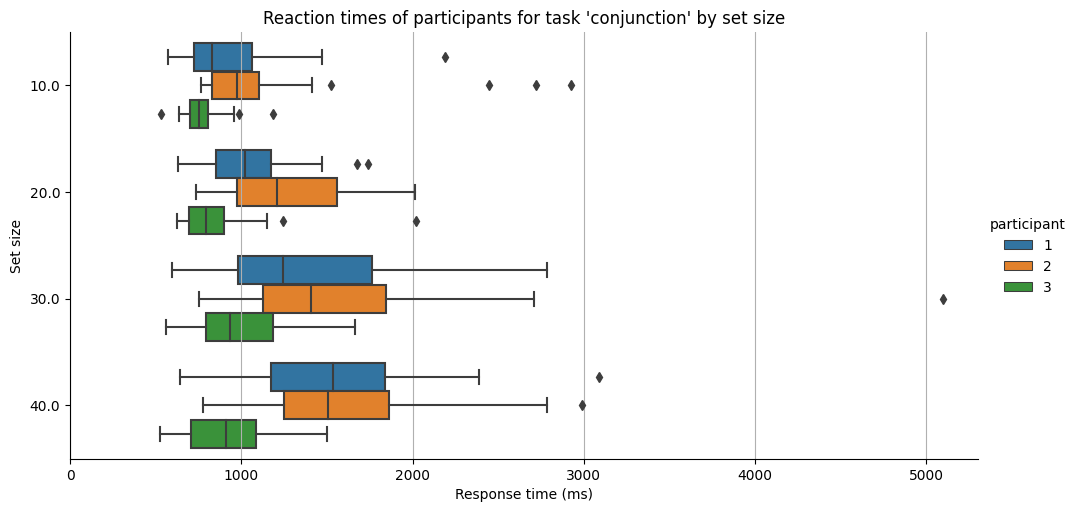

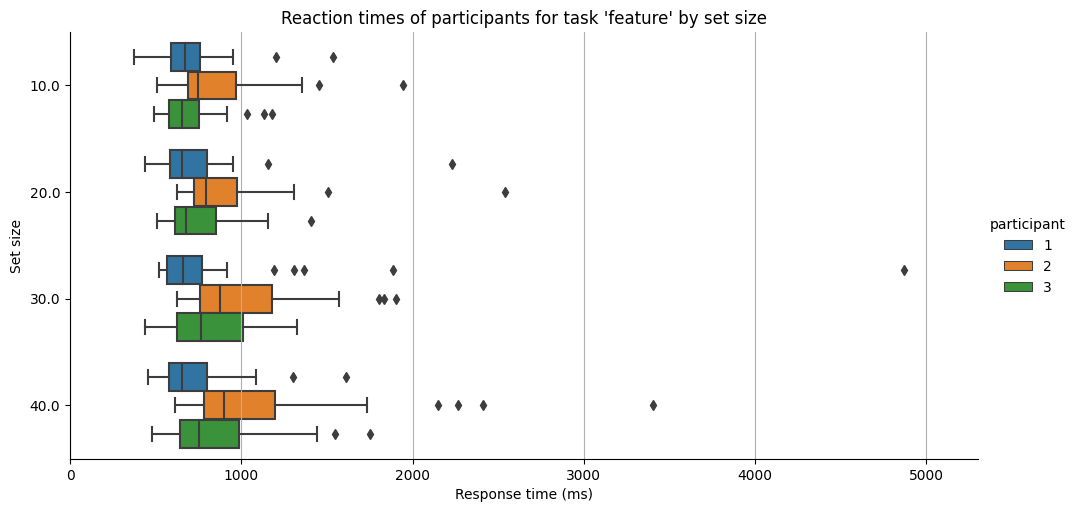

In [228]:
cf_task = lambda x: 'conjunction' if x else 'feature'

for is_conjuction in [True, False]:
    plot_reaction_times(
            correct_results[correct_results['conjuction'] == is_conjuction],
            title_str=f"Reaction times of participants for task '{cf_task(is_conjuction)}' by set size",
            x_size=correct_results["response_time"].max() + 200,
        )

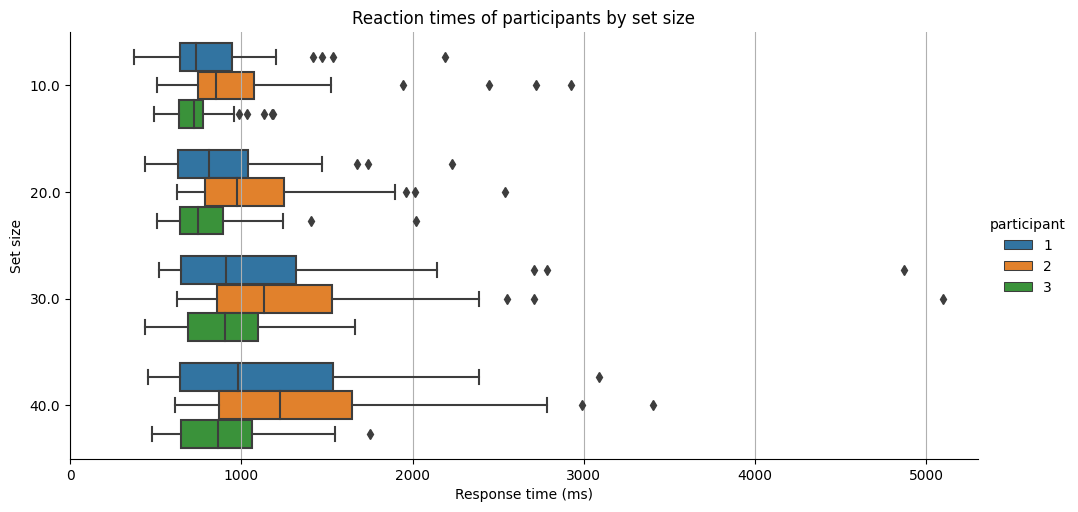

In [229]:
plot_reaction_times(correct_results, x_size=correct_results["response_time"].max() + 200)

In [285]:
participants = correct_results.participant.unique()

regresion_results = pd.DataFrame(
    columns=[
            "participant",
            "conjunction",
            "target_present",
            "size_slope",
            "conf_int_lower",
            "conf_int_upper",
        ]
    )

for participant in participants:
    for is_conjunction in [True, False]:
        for is_target_present in [True, False]:
            subset = correct_results[
                    (correct_results.participant == participant) &
                    (correct_results.conjuction == is_conjunction) &
                    (correct_results.target_present == is_target_present)
                ]
            
            sizes = subset['size']
            response_times = subset['response_time']
            
            model = sm.OLS(response_times, sm.add_constant(sizes)).fit()
            
            cfi = model.conf_int(alpha=.05)
            # print(cfi[1][1])
            # print(model.params[1])
            
            tmp = pd.DataFrame(
                    [
                        [
                            participant,
                            # Convert the `bool` variables to `int` to get rid of warning.
                            int(is_conjunction),
                            int(is_target_present),
                            model.params[1],
                            cfi[0][1],
                            cfi[1][1],
                        ]
                    ], 
                    columns=regresion_results.columns
                )
            
            tmp.head()
            
            regresion_results = pd.concat([regresion_results, tmp], ignore_index=True)

In [291]:
regresion_results["conjunction"] = regresion_results["conjunction"].astype(bool)
regresion_results["target_present"] = regresion_results["target_present"].astype(bool)

In [292]:
regresion_results

,participant,conjunction,target_present,size_slope,conf_int_lower,conf_int_upper
0,1,True,True,16.475000,7.952151,24.997849
1,1,True,False,28.413867,19.833737,36.993997
2,1,False,True,-2.078893,-6.434570,2.276783
3,1,False,False,4.799201,-6.034865,15.633266
4,2,True,True,5.555000,-4.937067,16.047067
5,2,True,False,30.932500,19.900390,41.964610
6,2,False,True,4.990000,-0.747140,10.727140
7,2,False,False,12.569000,3.149287,21.988713
8,3,True,True,1.205915,-3.279454,5.691285
9,3,True,False,9.178203,4.340256,14.016149
